In [1]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt


In [6]:
dt = pd.read_csv('total_waterborne_commerce.csv')
dt.head()

,Year,Total,Foreign,Domestic
0,1974,1746788544,764088905,982699639
1,1975,1695034366,748707407,946326959
2,1976,1835006819,855963909,979042910
3,1977,1908223619,935256813,972966806
4,1978,2021349754,946057889,1075291865


In [49]:
# fake1 = [1990 for i in range(0, 40)]
fake1 = np.linspace(0, 40, 40, dtype=int)
# fake1
# replace_at = 
# np.random.random_integers(1,5)
print(fake1)
replace_at = np.random.randint(0, 40, size=10)
for i in range(0, len(fake1)):
    if(i in replace_at):
        fake1[i] = np.random.randint(0, 40)
print(fake1)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 40]
[ 0  1 31  3  4  5  6  7  8  9 10 11 33 13 14 15 23 17 33 19 20 23 22 23
 24 25  1 27 17 29 30 31 32 33 29 35 36 37 38 24]


In [11]:
col1 = dt['Year'].values
col2 = dt['Total'].values
col3 = dt['Foreign'].values
col4 = dt['Domestic'].values
col4.ravel()

array([ 982699639,  946326959,  979042910,  972966806, 1075291865,
       1080312665, 1077483402, 1054456797,  957009596,  956520817,
       1032682486, 1014111539, 1037192777, 1076478216, 1111772499,
       1102532159, 1122298633, 1078551426, 1094629024, 1068179971,
       1099011258, 1093035277, 1100678628, 1112526914, 1094112032,
       1061786595, 1069804693, 1042472173, 1021000982, 1016136056,
       1047087648, 1028910423, 1023496165, 1021519349,  956335255,
        857084650,  893461204,  887930255,  884915432,  891151706])

In [27]:
# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [st.uniform, st.norm, st.zipf, st.linregress]
#     DISTRIBUTIONS = [st.linregress]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data) #TODO Study return parameters for different distributions

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

uniform , (-8.47929441641399e-06, 38.00009511488908), <scipy.stats._continuous_distns.uniform_gen object at 0x1139a02d0>


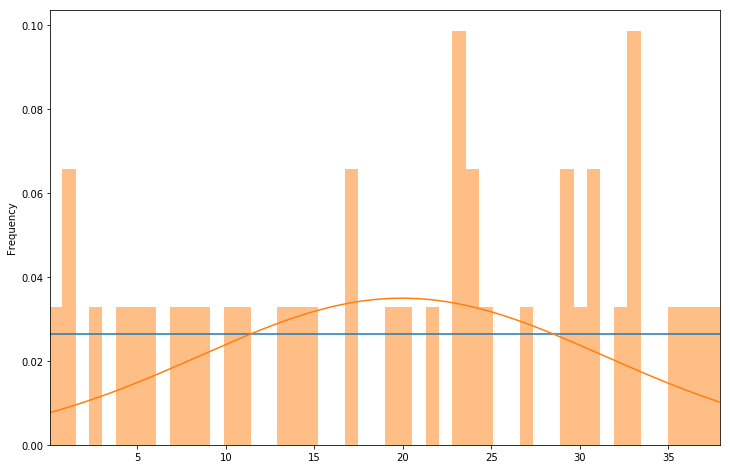

In [50]:
# Load data from statsmodels datasets
# data = pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())
data = pd.Series(fake1)

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, normed=True, alpha=0.5, color=plt.rcParams['axes.color_cycle'][1])
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fir_paramms = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)
print("{0} , {1}, {2}".format(best_fit_name, best_fir_paramms, best_dist ))

In [19]:
best_dist